# Perkenalan

Nama: Deoputra Wardiman<br>
Batch: 01

Data set yang digunakan adalah informasi mengenai projek-projek Kickstarter yang gagal dan berhasil serta berapa besar goal dan uang yang berhasil didonasikan dalam USD. Di sini saya ingin mencari tahu hubungan antara besarnya goal yang dipasang dan nasib projek tersebut pada akhirnya. Saya juga akan melihat apakah kategori akan berpengaruh juga

# Import Pustaka

In [32]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt

# Data Loading

In [2]:
df = pd.read_csv("./archive/ks-projects-201801.csv", error_bad_lines = False)

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.shape

(378661, 15)

In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


# Data Cleaning

Saya akan melakukan cleaning data terhadap 5 hal:<br>
1. Missing value: semua missing value akan didrop
2. Outlier: value yang terlalu tinggi atau rendah pada kolom goal akan didrop
3. Value yang terlalu kecil: bila value nya itu dibawah atau sama dengan 20 USD akan didrop
4. Category: Category yang terlalu sedikit akan saya drop
5. State: saya hanya mengambil data yang statusnya Successfull, Failed atau Canceled

## Drop Missing value

In [7]:
df = df.dropna()
df.shape

(374860, 15)

## Value yang terlalu kecil

In [8]:
newdf = df[
    df['usd_goal_real']>20
]
newdf.shape

(373007, 15)

## Removing Outlier

Disini saya akan menggunakan boxplot untuk menghilangkan outlier

In [9]:
newdf = newdf[
    newdf['usd_goal_real']<17000
]
newdf.shape

(281820, 15)

C:\Users\DEOWARDIMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='usd_goal_real'>

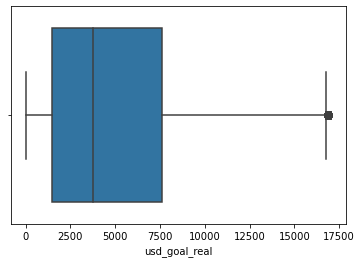

In [10]:
import seaborn as sns

sns.boxplot(newdf['usd_goal_real'])

In [11]:
q1,q2,q3 = np.percentile(newdf['usd_goal_real'],[25,50,75])

print("Nilai min   : ",newdf['usd_goal_real'].min())
print("Nilai Q1    : ",q1)
print("Nilai Median: ",q2)
print("Nilai Q3    : ",q3)
print("Batas outlier: ",q3+1.5*(q3-q1))
print("Nilai max   : ",newdf['usd_goal_real'].max())

Nilai min   :  20.1
Nilai Q1    :  1500.0
Nilai Median:  3754.88
Nilai Q3    :  7605.14
Batas outlier:  16762.850000000002
Nilai max   :  16999.0


## By category

In [12]:
newdf.groupby('category').count().sort_values(by=['main_category'])

,ID,name,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
category,,,,,,,,,,,,,,
Taxidermy,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Literary Spaces,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Chiptune,31,31,31,31,31,31,31,31,31,31,31,31,31,31
Letterpress,45,45,45,45,45,45,45,45,45,45,45,45,45,45
Quilts,64,64,64,64,64,64,64,64,64,64,64,64,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Documentary,10005,10005,10005,10005,10005,10005,10005,10005,10005,10005,10005,10005,10005,10005
Tabletop Games,10757,10757,10757,10757,10757,10757,10757,10757,10757,10757,10757,10757,10757,10757
Music,11169,11169,11169,11169,11169,11169,11169,11169,11169,11169,11169,11169,11169,11169


In [13]:
df_group_cat = newdf.groupby('category').count().reset_index()[['category','main_category']].sort_values('main_category', ascending = False)
df_group_cat['cat_count']=df_group_cat['main_category'].cumsum()
df_group_cat['perc_sum']=df_group_cat['cat_count']/df_group_cat['cat_count'].max()
df_group_cat=df_group_cat[df_group_cat['perc_sum']<=0.95]
df_group_cat

,category,main_category,cat_count,perc_sum
113,Product Design,13130,13130,0.046590
129,Shorts,11352,24482,0.086871
90,Music,11169,35651,0.126503
136,Tabletop Games,10757,46408,0.164672
39,Documentary,10005,56413,0.200174
...,...,...,...,...
152,Webcomics,553,265613,0.942492
60,Footwear,517,266130,0.944326
142,Thrillers,514,266644,0.946150
139,Television,508,267152,0.947953


In [14]:
newdf = newdf[newdf['category'].isin(df_group_cat['category'])]
newdf.shape

(267655, 15)

## By State

In [15]:
newdf.groupby('state').count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,,,,,,,,
canceled,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796
failed,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715
live,1875,1875,1875,1875,1875,1875,1875,1875,1875,1875,1875,1875,1875,1875
successful,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157
suspended,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112


In [16]:
newdf=newdf[newdf['state']!='live']
newdf=newdf[newdf['state']!='suspended']

newdf.shape

(264668, 15)

In [17]:
newdf.groupby('state').count()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real
state,,,,,,,,,,,,,,
canceled,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796,22796
failed,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715,131715
successful,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157,110157


## Menentukan kolom yang akan dipakai

In [18]:
newdf = newdf.loc[:,['ID','name','category','main_category','state','usd_goal_real']]

In [19]:
newdf

,ID,name,category,main_category,state,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,1533.95
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,5000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,1000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,failed,2406.39
11,100005484,Lisa Lim New CD!,Indie Rock,Music,successful,12500.00
...,...,...,...,...,...,...
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,canceled,4949.60
378657,999977640,The Tribe,Narrative Film,Film & Video,failed,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,failed,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,failed,15000.00


# Eksplorasi data

In [20]:
newdf['usd_goal_real'].describe()

count    264668.000000
mean       5001.178006
std        4292.858563
min          20.100000
25%        1500.000000
50%        3789.430000
75%        7610.930000
max       16999.000000
Name: usd_goal_real, dtype: float64

<AxesSubplot:ylabel='Frequency'>

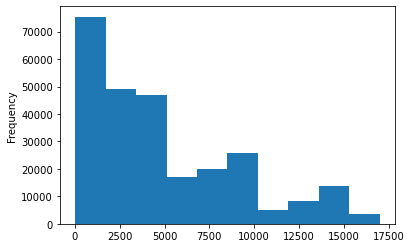

In [21]:
newdf['usd_goal_real'].plot.hist(bins=10,density=False)

# Measure of Central Tendency

In [22]:
print("Mean: ",newdf['usd_goal_real'].mean())
print("Median: ",newdf['usd_goal_real'].median())
print("Modus: ",newdf['usd_goal_real'].mode())
print("STD: ",newdf['usd_goal_real'].std())

Mean:  5001.178005916853
Median:  3789.43
Modus:  0    5000.0
dtype: float64
STD:  4292.85856275322


# Measure of Variance

In [23]:
print("Nilai min   : ",newdf['usd_goal_real'].min())
print("Nilai Q1    : ",q1)
print("Nilai Median: ",q2)
print("Nilai Q3    : ",q3)
print("Batas outlier: ",q3+1.5*(q3-q1))
print("Nilai max   : ",newdf['usd_goal_real'].max())
print("Nilai range: ",newdf['usd_goal_real'].max()-newdf['usd_goal_real'].min())

Nilai min   :  20.1
Nilai Q1    :  1500.0
Nilai Median:  3754.88
Nilai Q3    :  7605.14
Batas outlier:  16762.850000000002
Nilai max   :  16999.0
Nilai range:  16978.9


# Hypothesis testing

## Mencari confidence interval

(5109.863774712354, 20837.015757474284)


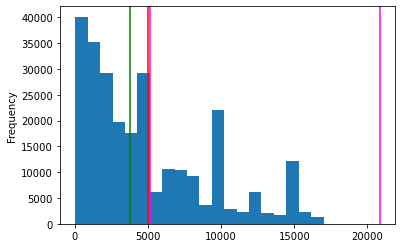

In [78]:
ci = stats.expon.interval(0.95,newdf['usd_goal_real'].mean(), newdf['usd_goal_real'].std())
newdf['usd_goal_real'].plot.hist(bins=20,density=False)
plt.axvline(newdf['usd_goal_real'].mean(), color = 'red')
plt.axvline(newdf['usd_goal_real'].median(), color = 'green')
plt.axvline(ci[0], color = 'magenta')
plt.axvline(ci[1], color = 'magenta')
print(ci)

In [27]:
df_fail = newdf[(newdf['state']=='failed')|
               (newdf['state']=='canceled')]
df_success = newdf[newdf['state']=='successful']

In [28]:
print(df_fail['usd_goal_real'].mean())
print(df_success['usd_goal_real'].mean())

5453.3278213848935
4366.973006345518


In [29]:
df_fail.head()

,ID,name,category,main_category,state,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,1533.95
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,failed,5000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,failed,2406.39
12,1000055792,The Cottage Market,Crafts,Crafts,failed,5000.00
15,1000064368,Survival Rings,Design,Design,failed,2500.00


In [30]:
df_success.head()

,ID,name,category,main_category,state,usd_goal_real
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,successful,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,successful,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,successful,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,successful,250.00
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,successful,175.00


H0: Rata-rata dari goal yang fail <= rata-rata dari goal yang success<br>
H1: Rata-rata dari goal yang fail > rata-rata dari goal yang success<br>
<br>
alpha: 0.05

In [100]:
# Independent T-Test
t,p = stats.ttest_ind(df_fail['usd_goal_real'], df_success['usd_goal_real'])
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value

print("Failed sample mean:", np.mean(df_fail['usd_goal_real']))
print("Successful sample mean:", np.mean(df_success['usd_goal_real']))
print("t-statistic:" , str(t))
print("p-value:" , float(p))

Failed sample mean: 5453.3278213848935
Successful sample mean: 4366.973006345518
t-statistic: 64.67922200248955
p-value: 0.0


Disini P Value yang di dapat adalah lebih kecil dari 0.05 maka dari itu dapat disimpulkan, H1 dapat diterima dan H0 dapat ditolak